In [39]:
# Importando as bibliotecas necessárias
import seaborn as sns  # Para carregar datasets de exemplo e visualizar dados
import pandas as pd  # Para manipulação de dados em formato tabular
import numpy as np  # Para operações matemáticas e manipulação de arrays
from sklearn.cluster import KMeans  # Para realizar clustering com o algoritmo K-Means
from sklearn.preprocessing import StandardScaler  # Para normalização dos dados (não foi usado aqui)
import matplotlib.pyplot as plt  # Para visualizações gráficas

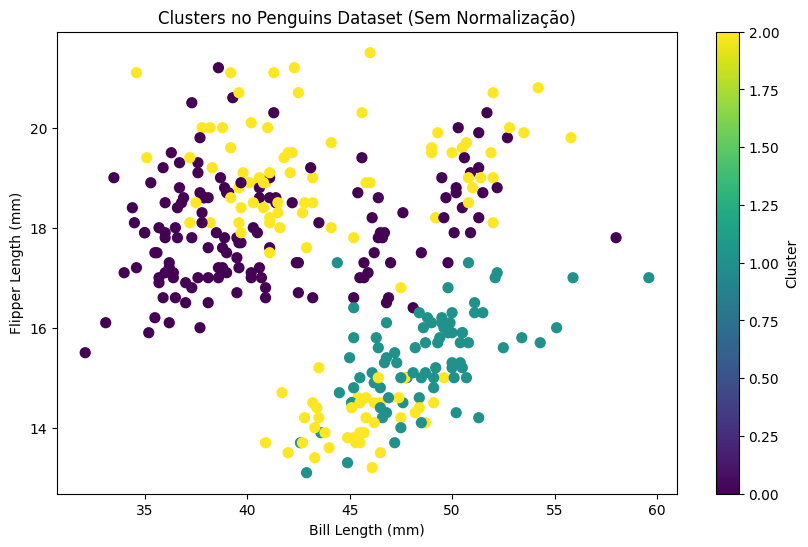

C:\Users\lsantos69\AppData\Local\Temp\ipykernel_24428\1173559086.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'] = df.groupby(['species', 'cluster'])['species'].transform('count')


,species,cluster,count
0,Adelie,0,94
7,Adelie,2,52
152,Chinstrap,0,46
153,Chinstrap,2,22
220,Gentoo,2,39
221,Gentoo,1,80


A acurácia da classificação da especie Adelie fou de 35.62%.
A acurácia da classificação da especie Chinstrap fou de 67.65%.
A acurácia da classificação da especie Gentoo fou de 67.23%.


In [ ]:
# Carregando o dataset "penguins" disponível no seaborn
data = sns.load_dataset('penguins')

# Removendo as linhas com valores ausentes (NaN) no dataset
data = data.dropna()

# Definindo as colunas que serão utilizadas como features para clustering
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Selecionando as features no dataset para realizar o clustering
X = data[features]

# Configurando o modelo de clustering K-Means para criar 3 clusters e fixando a seed para reprodutibilidade
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustando o modelo aos dados e atribuindo os clusters a cada ponto
clusters = kmeans.fit_predict(X)

# Adicionando a informação dos clusters ao dataset original
data['cluster'] = clusters

# Criando uma figura para visualização dos clusters
plt.figure(figsize=(10, 6))

# Criando um scatter plot para mostrar os clusters
# Cada ponto será colorido de acordo com seu cluster
plt.scatter(X[features[0]], X[features[1]], c=clusters, cmap='viridis', s=50)

# Adicionando título e rótulos ao gráfico
plt.title("Clusters no Penguins Dataset (Sem Normalização)")
plt.xlabel("Bill Length (mm)")  # Comprimento do bico em milímetros
plt.ylabel("Flipper Length (mm)")  # Comprimento da nadadeira em milímetros

# Adicionando uma barra de cores para identificar os clusters
plt.colorbar(label='Cluster')

# Exibindo o gráfico
plt.show()

# Criando um DataFrame com as espécies e os clusters
df = data[['species', 'cluster']]

# Adicionando uma coluna 'count' que mostra o número de ocorrências de cada espécie em cada cluster
df['count'] = df.groupby(['species', 'cluster'])['species'].transform('count')

# Removendo linhas duplicadas, mantendo uma entrada por espécie e cluster
df = df.drop_duplicates(subset=['species', 'cluster'])


# Exibindo o DataFrame final para visualização
display(df)

def calcular_acuracia(especie, cluster):
    # Calculando o total de 'count'
    df_especie = df[df['species']== especie]
    total_count = df_especie['count'].sum()

    # Filtrando o valor de 'count' do cluster 2
    cluster_2_count = df_especie[df_especie['cluster'] == cluster]['count'].iloc[0]

    # Calculando o percentual
    percentual = (cluster_2_count / total_count) * 100

    # Imprimindo o resultado
    print(f"A acurácia da classificação da especie {especie} fou de {percentual:.2f}%.")
    
ac_adelie_sem = calcular_acuracia('Adelie',2 )
ac_chinstrap_sem = calcular_acuracia('Chinstrap',0 )
ac_gentoo_sem = calcular_acuracia('Gentoo',1 )
 


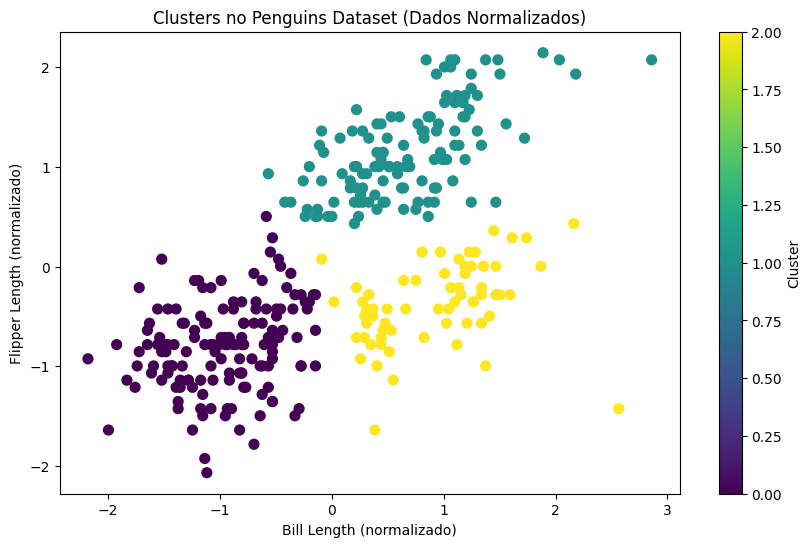

C:\Users\lsantos69\AppData\Local\Temp\ipykernel_24428\2155937595.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['count'] = df.groupby(['species', 'cluster'])['species'].transform('count')


,species,cluster,count
0,Adelie,0,141
19,Adelie,2,4
129,Adelie,1,1
152,Chinstrap,2,59
172,Chinstrap,0,5
189,Chinstrap,1,4
220,Gentoo,1,118
318,Gentoo,2,1


A acurácia da classificação da especie Adelie fou de 96.58%.
A acurácia da classificação da especie Chinstrap fou de 86.76%.
A acurácia da classificação da especie Gentoo fou de 99.16%.


In [ ]:
# Importando o dataset "penguins" do seaborn
data = sns.load_dataset('penguins')

# Removendo linhas com valores ausentes (NaN) para evitar problemas no processamento
data = data.dropna()

# Alterando a lista de features para usar apenas duas colunas: comprimento do bico e comprimento da nadadeira
features = ['bill_length_mm', 'flipper_length_mm']

# Extraindo as colunas selecionadas do dataset
X = data[features]

# Criando um objeto StandardScaler para normalizar os dados
# A normalização coloca os dados em uma escala com média 0 e desvio padrão 1
scaler = StandardScaler()

# Aplicando a normalização às features e armazenando o resultado
X_normalized = scaler.fit_transform(X)

# Configurando o modelo de clustering K-Means para criar 3 clusters, com uma seed fixa para reprodutibilidade
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajustando o modelo aos dados normalizados e atribuindo cada ponto a um cluster
clusters = kmeans.fit_predict(X_normalized)

# Adicionando a informação dos clusters como uma nova coluna no dataset original
data['cluster'] = clusters

# Criando uma figura para visualização
plt.figure(figsize=(10, 6))

# Criando um scatter plot para mostrar os clusters
# As coordenadas normalizadas são usadas no gráfico
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=clusters, cmap='viridis', s=50)

# Adicionando título e rótulos ao gráfico
plt.title("Clusters no Penguins Dataset (Dados Normalizados)")
plt.xlabel("Bill Length (normalizado)")  # Comprimento do bico, após normalização
plt.ylabel("Flipper Length (normalizado)")  # Comprimento da nadadeira, após normalização

# Adicionando uma barra de cores para identificar os clusters
plt.colorbar(label='Cluster')

# Exibindo o gráfico
plt.show()

# Criando um DataFrame com as espécies e os clusters
df = data[['species', 'cluster']]

# Adicionando uma coluna 'count' com a contagem de ocorrências de cada espécie dentro de cada cluster
df['count'] = df.groupby(['species', 'cluster'])['species'].transform('count')

# Removendo duplicatas para que cada combinação espécie-cluster apareça apenas uma vez
df = df.drop_duplicates(subset=['species', 'cluster'])

# Exibindo as 10 primeiras linhas do DataFrame resultante
display(df)

def calcular_acuracia(especie, cluster):
    # Calculando o total de 'count'
    df_especie = df[df['species']== especie]
    total_count = df_especie['count'].sum()

    # Filtrando o valor de 'count' do cluster 2
    cluster_2_count = df_especie[df_especie['cluster'] == cluster]['count'].iloc[0]

    # Calculando o percentual
    percentual = (cluster_2_count / total_count) * 100

    # Imprimindo o resultado
    print(f"A acurácia da classificação da especie {especie} fou de {percentual:.2f}%.")
    
calcular_acuracia('Adelie',0 )
calcular_acuracia('Chinstrap',2 )
calcular_acuracia('Gentoo',1 )
